In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv('results.csv')

In [3]:
data.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [4]:
num_col = ['10k','25k','age','official','35k','pace','30k','5k','half','20k','40k']

In [5]:
data = data.replace('-',np.NaN)
data = data.dropna(subset=num_col)
len(data)

31649

In [6]:
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [7]:
data_num = data.loc[:,['10k','25k','age','official','35k','pace','30k','5k','half','20k','40k']]

In [8]:
data_num = data_num.astype(float)

In [9]:
#Normalize data
data_norm = normalize(data_num)

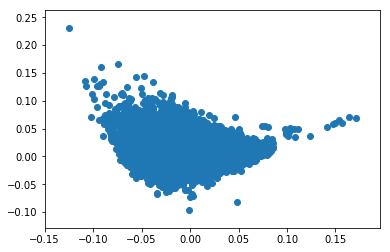

In [10]:
#PCA to reduce data for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_norm)

plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.show()

In [11]:
#PCA to reduce data to 5
pca5 = PCA(n_components=5)
data_pca5 = pca5.fit_transform(data_norm)

In [12]:
data_num.iloc[(data_pca[:,0] > 0.14),:]

,10k,25k,age,official,35k,pace,30k,5k,half,20k,40k
0,17.37,47.67,47.0,85.25,71.40,3.27,59.18,8.02,39.72,37.65,80.43
2,16.62,45.80,41.0,80.60,67.42,3.08,56.45,7.75,38.03,36.10,76.10
4,17.12,46.37,40.0,81.23,67.83,3.10,57.03,8.02,38.60,36.58,76.72
8,17.12,46.37,43.0,81.23,67.83,3.10,57.03,8.00,38.60,36.60,76.70
12,18.13,49.17,49.0,86.95,72.60,3.32,60.85,8.40,41.18,39.03,82.17
24,18.30,50.33,47.0,89.40,74.95,3.42,62.33,8.67,41.80,39.63,84.48
36,19.37,54.20,49.0,95.28,79.60,3.65,66.62,8.93,44.82,42.47,90.07


In [18]:
#2 Clusters
km = KMeans(n_clusters=2)
y_pred = km.fit_predict(data_pca5)

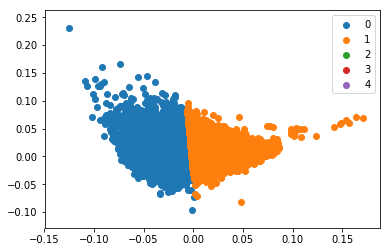

In [19]:
for num in range(5):
    plt.scatter(data_pca[(y_pred==num),0],data_pca[(y_pred==num),1], label=num)
plt.legend()
plt.show()

In [22]:
data['km_cluster2'] = y_pred

In [52]:
data_pca[0:5,0]

array([0.16417815, 0.03476042, 0.14736004, 0.00385727, 0.14125645])

In [71]:
for num in range(2):
    print(num, data.loc[(y_pred == num), ['half','official','pace']].mean(), '\n')
print('--------------------','\n','Age v Pace','\n')
for num in range(2):
    print(num,'\n', data.loc[(y_pred == num), ['age','pace']].mean(), '\n')
print('--------------------','\n','Running Times','\n')
for num in range(2):
    print(num,'\n', data_num.loc[(y_pred == num), ['5k','10k','20k',
                                                   '30k','40k']].mean(), '\n')
print('--------------------','\n','Stats','\n')
for num in range(2):
    print(num,'\n', data.country[(y_pred == num)].value_counts().head(), '\n')

0 official    267.603471
pace         10.214811
dtype: float64 

1 official    220.425921
pace          8.415431
dtype: float64 

-------------------- 
 Age v Pace 

0 
 age     35.556333
pace    10.214811
dtype: float64 

1 
 age     48.115760
pace     8.415431
dtype: float64 

-------------------- 
 Running Times 

0 
 5k      27.419547
10k     55.274768
20k    113.751475
30k    179.527398
40k    252.485266
dtype: float64 

1 
 5k      24.216968
10k     48.569534
20k     98.246865
30k    150.776034
40k    207.801328
dtype: float64 

-------------------- 
 Stats 

0 
 USA    13229
CAN      491
GBR      111
MEX       71
ITA       61
Name: country, dtype: int64 

1 
 USA    13710
CAN     1673
GBR      230
ITA      148
JPN      139
Name: country, dtype: int64 



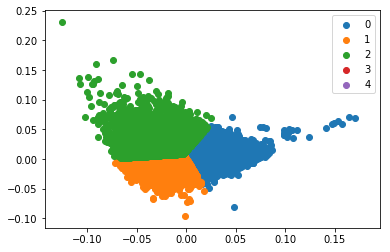

In [17]:
#3 Clusters
km1 = KMeans(n_clusters=3)
y_pred1 = km1.fit_predict(data_pca5)

#Graph
for num in range(5):
    plt.scatter(data_pca[(y_pred1==num),0],data_pca[(y_pred1==num),1], label=num)
plt.legend()
plt.show()

In [24]:
data['km_cluster3'] = y_pred1

In [74]:
for num in range(3):
    print(num, data.loc[(y_pred1 == num), ['half','official','pace']].mean(), '\n')
print('--------------------','\n','Age v Pace','\n')
for num in range(3):
    print(num, data.loc[(y_pred1 == num), ['age','pace']].mean(), '\n')
print('--------------------','\n','Running Times','\n')
for num in range(3):
    print(num,'\n', data_num.loc[(y_pred1 == num), ['5k','10k','20k',
                                                   '30k','40k']].mean(), '\n')
print('--------------------','\n','Stats','\n')
for num in range(3):
    print(num,'\n', data.country[(y_pred1 == num)].value_counts().head(), '\n')

0 official    218.466511
pace          8.340697
dtype: float64 

1 official    250.472979
pace          9.561475
dtype: float64 

2 official    286.137625
pace         10.921657
dtype: float64 

-------------------- 
 Age v Pace 

0 age     48.871682
pace     8.340697
dtype: float64 

1 age     33.257217
pace     9.561475
dtype: float64 

2 age     43.498419
pace    10.921657
dtype: float64 

-------------------- 
 Running Times 

0 
 5k      24.122523
10k     48.374059
20k     97.795125
30k    149.863712
40k    206.008139
dtype: float64 

1 
 5k      27.019330
10k     54.374942
20k    111.040219
30k    171.990496
40k    236.772864
dtype: float64 

2 
 5k      27.078456
10k     54.676411
20k    113.606760
30k    184.385137
40k    268.869506
dtype: float64 

-------------------- 
 Stats 

0 
 USA    11656
CAN     1514
GBR      200
ITA      123
JPN      123
Name: country, dtype: int64 

1 
 USA    10348
CAN      389
GBR       80
MEX       48
IRL       34
Name: country, dtype: int64 

2 


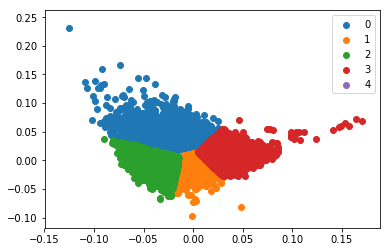

In [20]:
#4 Clusters
km2 = KMeans(n_clusters=4)
y_pred2 = km2.fit_predict(data_pca5)

#Graph
for num in range(5):
    plt.scatter(data_pca[(y_pred2==num),0],data_pca[(y_pred2==num),1], label=num)
plt.legend()
plt.show()

In [25]:
data['km_cluster4'] = y_pred2

In [75]:
for num in range(4):
    print(num, data.loc[(y_pred2 == num), ['half','official','pace']].mean(), '\n')
print('--------------------','\n','Age v Pace','\n')
for num in range(4):
    print(num, data.loc[(y_pred2 == num), ['age','pace']].mean(), '\n')
print('--------------------','\n','Running Times','\n')
for num in range(4):
    print(num,'\n', data_num.loc[(y_pred2== num), ['5k','10k','20k',
                                                   '30k','40k']].mean(), '\n')
print('--------------------','\n','Stats','\n')
for num in range(4):
    print(num,'\n', data.country[(y_pred2 == num)].value_counts().head(), '\n')

0 official    278.025501
pace         10.612214
dtype: float64 

1 official    224.040036
pace          8.553281
dtype: float64 

2 official    280.525103
pace         10.707794
dtype: float64 

3 official    216.052770
pace          8.248577
dtype: float64 

-------------------- 
 Age v Pace 

0 age     47.119577
pace    10.612214
dtype: float64 

1 age     39.191939
pace     8.553281
dtype: float64 

2 age     31.001454
pace    10.707794
dtype: float64 

3 age     51.685208
pace     8.248577
dtype: float64 

-------------------- 
 Running Times 

0 
 5k      26.394910
10k     53.232883
20k    110.148434
30k    178.011001
40k    260.864095
dtype: float64 

1 
 5k      24.968440
10k     50.054789
20k    101.194437
30k    154.825517
40k    211.660348
dtype: float64 

2 
 5k      28.832081
10k     58.251072
20k    120.389763
30k    190.101185
40k    265.123805
dtype: float64 

3 
 5k      23.838328
10k     47.808218
20k     96.640403
30k    148.039988
40k    203.632981
dtype: float64 

-

In the two clusters model, we can see the clusters are broken up into younger people with a faster pace and older people with a slower pace. Older, slower people in this cluster model are also more likely to be from Canada. 

In the three clusters model, there are groups broken into older people with the fastest pace, young people with a fast pace, and older people with a slow pace. Both older groups have a higher percentage from Canada. The younger group along with the older group with a faster pace started out at the same speed for 5k and 10k, but the older group slowed down and had an overall slower pace and speed for the remainder of the marathon.

In the four clusters model, there are groups broken into two older groups: one with a fast pace and one with a slow pace and two younger groups: one with a fast pace and one with a slow pace. Both of the slower paced groups have around the same pace and similarly so does the faster paced groups. In both pairs of groups, the older groups ran the race faster than the younger groups. Both of the faster groups had a higher percentage of Canadians. 